# DATA ANALYSIS USING STATISTICAL METHODS

## Title : Airlines Delay Prediction

## Abstract : 

Airline delays are a major issue in the aviation industry, causing significant disruptions to travelers, airlines, and airport operations. This project focuses on analyzing a dataset containing information about airline flights and their delays, in order to identify patterns and potential causes of delays.
The project first performs exploratory data analysis to gain insights into the data. Logistic regression is used to build a model that predicts whether a flight will be delayed or not, based on the available features. Linear model selection and regularization techniques are then applied to the model in order to improve its performance and interpretability.
The results of the analysis can be used by airlines and airport operators to improve their operations and reduce delays, ultimately improving the overall customer experience. The project also highlights the importance of data analysis and modeling in identifying and mitigating problems in complex systems like the aviation industry.



## Chapter 1 : Introduction

Airline delays are a pervasive problem in the aviation industry, causing significant disruptions to travelers and operators alike. Delayed flights can result in missed connections, lost revenue for airlines, and increased costs for airports. In addition, delays can negatively impact the overall customer experience, leading to decreased satisfaction and potential loss of future business.

The objective of this project is to analyze a dataset containing information about airline flights and their delays, in order to identify patterns and potential causes of delays. The dataset includes variables such as the flight number, airline, departure and arrival airports, day of the week, and length of the flight, among others.

The project aims to build a model that predicts whether a flight will be delayed or not, based on the available features. This model can then be used by airlines and airport operators to improve their operations and reduce delays, ultimately improving the overall customer experience.



## Chapter 2 : Dataset Description



The dataset contains information about airline flights and their delays, with 539,382 records and 8 columns. The columns include:

* Flight: The flight number
* Time: The scheduled departure time of the flight
* Length: The duration of the flight in minutes
* Airline: The airline carrier
* AirportFrom: The departure airport
* AirportTo: The arrival airport
* DayOfWeek: The day of the week
* Class: Whether the flight was delayed (1) or not (0)


The dataset contains both numerical and categorical variables. 

Dataset link : https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay?resource=download

# Chapter 3 : Methodologies

##  Z-test :
Z test is a statistical test used to compare the means of two samples. It is a hypothesis testing method that assumes the two samples are normally distributed and have known population variances. The test calculates a Z-score and determines the probability of observing a sample mean as extreme as the one observed if the null hypothesis is true.

## F test for ANOVA:
F test, also known as the Analysis of Variance (ANOVA) test, is used to determine whether the means of two or more samples are equal or not. It tests whether there is a significant difference between the means of the samples, and it is a hypothesis testing method that compares the variances of the samples.

## Tukey's test:
Tukey's test is a post-hoc test used after an ANOVA to determine which pairs of means are significantly different from each other. It compares all possible pairwise combinations of group means and calculates a confidence interval for each comparison. If the confidence interval does not include zero, the two means are considered significantly differen

## Chi-square test:
Chi-square test is a statistical method used to test the independence of categorical variables. It is used to determine whether there is a significant association between two categorical variables. The test calculates a chi-square statistic and compares it to a critical value to determine whether the variables are dependent or independent.

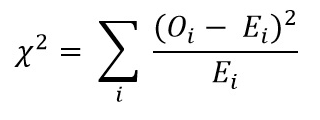

## Linear regression:
Linear regression is a statistical method used to model the relationship between two continuous variables. It involves fitting a line to the data to determine the strength and direction of the relationship between the variables. The line is determined using the least squares method, which minimizes the sum of the squared residuals.

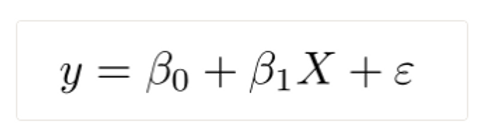

## Logistic regression:
Logistic regression is a statistical method used to model the relationship between a binary dependent variable and one or more independent variables. It is used to determine the probability of an event occurring, given a set of predictors. The method uses a logistic function to model the relationship between the dependent and independent variables.

## Resampling methods: cross-validation, bootstrapping:

* Cross-validation is a method that involves dividing the data into k subsets, training the model on k-1 subsets and testing it on the remaining subset. 

* Bootstrapping is a method that involves randomly sampling the data with replacement to create multiple datasets and fitting the model to each dataset.

## Forward selection:
Forward selection is a variable selection method used in linear regression. It involves starting with no variables and adding variables one by one to the model, based on the improvement in the model's fit.

## Backward selection:
Backward selection is a variable selection method used in linear regression. It involves starting with all variables in the model and removing variables one by one, based on the improvement in the model's fit.

## Splines:
Splines are a statistical method used to model non-linear relationships between variables. They involve dividing the data into smaller segments and fitting a polynomial function to each segment. The functions are then joined together at the breakpoints to create a smooth curve.

## Polynomial regression:
Polynomial regression is a statistical method used to model non-linear relationships between variables. It involves fitting a polynomial function to the data, where the degree of the polynomial determines the shape of the curve. The method can be used to model relationships that are not well-fit by linear regression.

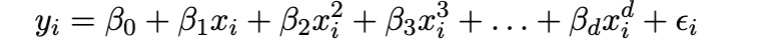

In [ ]:
#Import all necessary libraries

In [1]:
pip install joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, precision_score, recall_score, f1_score, r2_score
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from imblearn.over_sampling import RandomOverSampler
from joblib import Parallel, delayed
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from patsy import dmatrix


In [3]:
data = pd.read_csv("airlines_delay.csv")

In [4]:
data.shape

(539382, 8)

In [5]:
data.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [6]:
data.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [7]:
data = data.dropna()
data.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [8]:
data.columns

Index(['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'Class'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 37.0+ MB


In [10]:
data.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


<AxesSubplot:xlabel='Airline', ylabel='count'>

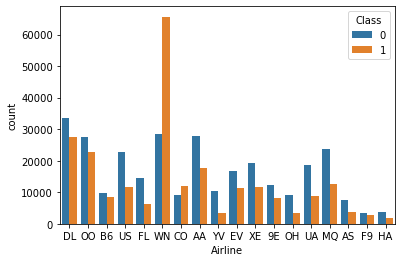

In [11]:
sns.countplot(x='Airline', hue='Class', data=data)

<AxesSubplot:xlabel='Airline', ylabel='Length'>

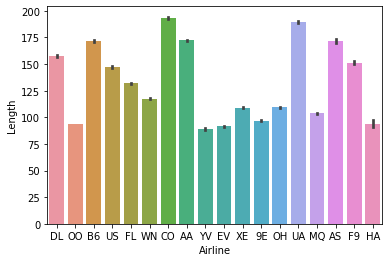

In [12]:
sns.barplot(x='Airline', y='Length', data=data)

Insights:- Here we see CO and UA have longest average flight time.


<AxesSubplot:xlabel='Airline', ylabel='Time'>

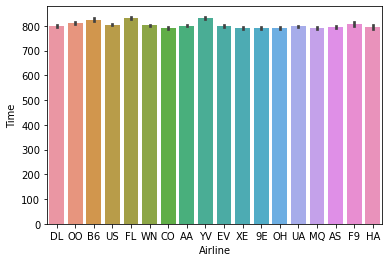

In [13]:
sns.barplot(x='Airline', y='Time', data=data)


Almost all flights have the same departure time

<AxesSubplot:>

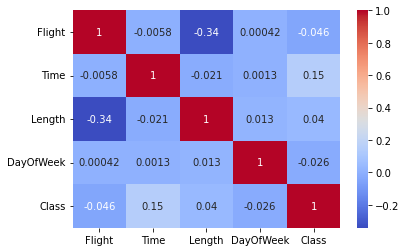

In [14]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


# 4.1 Comparing 2 samples

In [43]:
# Splitting the dataset into two samples based on the 'AIRLINE' variable
sample1 = data[data['Airline'] == 'AA']['Class']
sample2 = data[data['Airline'] == 'UA']['Class']

In [44]:
sample1.count

<bound method Series.count of 7         0
89        0
92        0
94        0
99        0
         ..
539313    1
539336    1
539338    1
539339    1
539342    1
Name: Class, Length: 45656, dtype: int64>

In [45]:
sample2.count

<bound method Series.count of 25        0
31        0
37        0
40        0
42        0
         ..
539234    1
539288    1
539307    1
539320    1
539351    1
Name: Class, Length: 27619, dtype: int64>

### As sample size>30, we use Z-test to compare the 2 samples
* H0 = There is no significant difference between the two sample means.
* H1 = There is significant difference between the two sample means.

In [46]:
z_stat, p_value = ztest(sample1, sample2)
alpha = 0.05

if p_value < alpha:
    print(f"Reject null hypothesis")
else:
    print(f"Failed to reject null hypothesis")

Reject null hypothesis


### Conclusion : We reject the null hypothesis and conclude that there is significant difference between the 2 sample means


#### Shapiro test for normality (as an experiment)

In [51]:
le = LabelEncoder()
data['Airline'] = le.fit_transform(data['Airline'])
data['AirportFrom'] = le.fit_transform(data['AirportFrom'])
data['AirportTo'] = le.fit_transform(data['AirportTo'])
data['Flight'] = le.fit_transform(data['Flight'])

In [52]:
from scipy.stats import shapiro

stat, p = shapiro(data)
alpha = 0.05
if p > alpha:
    print('Data is Normally distributed (fail to reject H0)')
else:
    print('Data is not Normally distributed (reject H0)')


Data is not Normally distributed (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Therefore, as the sample size is large enough for the Central Limit Theorem to apply, we used the z-test
### Conclusion : There is significant difference between the 2 means of the samples


# 4.2 Analysis of Variance (ANOVA)

### Using F-test

In [49]:
new_data = data.copy()
new_data = new_data[(new_data['Airline'] != 'NK') & (new_data['Airline'] != 'VK')]


* H0 = There is no significant difference in the means of the different groups
* H1 = There is significant difference in the means of the different groups

In [50]:
#Perform ANOVA to check if there is a significant difference in the means of the different groups using F-test
f_stat, p_value = f_oneway(new_data[new_data['Airline'] == 'AA']['Class'], 
                           new_data[new_data['Airline'] == 'UA']['Class'], 
                           new_data[new_data['Airline'] == 'DL']['Class'],
                           new_data[new_data['Airline'] == 'AS']['Class'],
                           new_data[new_data['Airline'] == 'B6']['Class'],
                           new_data[new_data['Airline'] == 'EV']['Class'],
                           new_data[new_data['Airline'] == 'F9']['Class'],
                           new_data[new_data['Airline'] == 'HA']['Class'],
                           new_data[new_data['Airline'] == 'MQ']['Class'],
                           new_data[new_data['Airline'] == 'OO']['Class'],
                           new_data[new_data['Airline'] == 'US']['Class'],
                           new_data[new_data['Airline'] == 'WN']['Class'])
                         

print("F-statistic: ", f_stat)
print("p-value: ", p_value)
#Comparing 12 airlines with the Class i.e. the target variable

F-statistic:  2918.6095435149787
p-value:  0.0



## As F-statistic is greater than p-value, we reject the null hypothesis, there is difference in the means of the different groups so we perform the Tukey's test
### Tukey's Test 

In [ ]:
# Perform Tukey's test
tukey_results = pairwise_tukeyhsd(data['Class'], data['Airline'], alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    9E     AA  -0.0092 0.6642 -0.0232  0.0048  False
    9E     AS  -0.0584  0.001 -0.0778 -0.0389   True
    9E     B6   0.0694  0.001  0.0524  0.0864   True
    9E     CO   0.1685  0.001  0.1522  0.1849   True
    9E     DL   0.0528  0.001  0.0394  0.0663   True
    9E     EV   0.0045    0.9 -0.0108  0.0199  False
    9E     F9   0.0514  0.001  0.0275  0.0752   True
    9E     FL  -0.0964  0.001 -0.1128   -0.08   True
    9E     HA  -0.0775  0.001 -0.1027 -0.0523   True
    9E     MQ  -0.0496  0.001 -0.0641  -0.035   True
    9E     OH  -0.1204  0.001 -0.1393 -0.1015   True
    9E     OO   0.0552  0.001  0.0414   0.069   True
    9E     UA  -0.0738  0.001 -0.0891 -0.0584   True
    9E     US  -0.0617  0.001 -0.0764  -0.047   True
    9E     WN   0.3001  0.001  0.2873  0.3129   True
    9E     XE  -0.0187 0.0018 -0.0337 -0.0037 

### Conclusion : There are a few groups that have significantly different means. As we can see the 'reject' column with False indicates that that these groups have different means. 

# 4.3 Analysis of Categorical Data: 

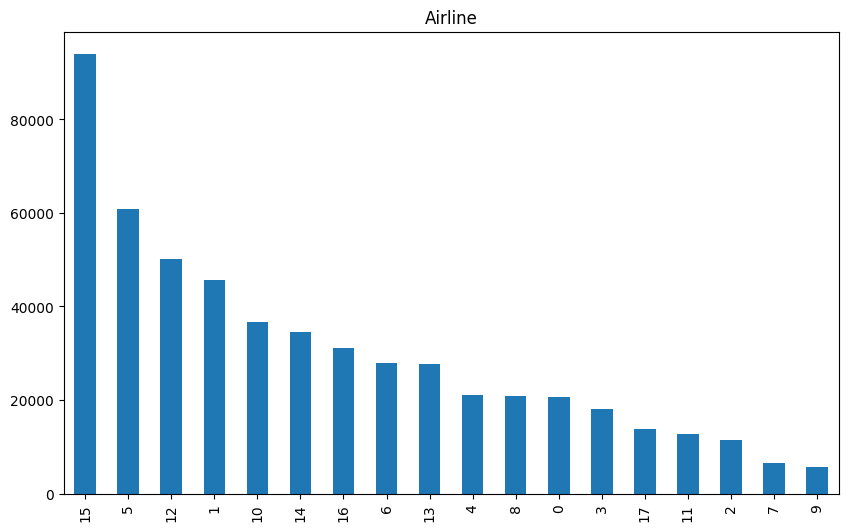

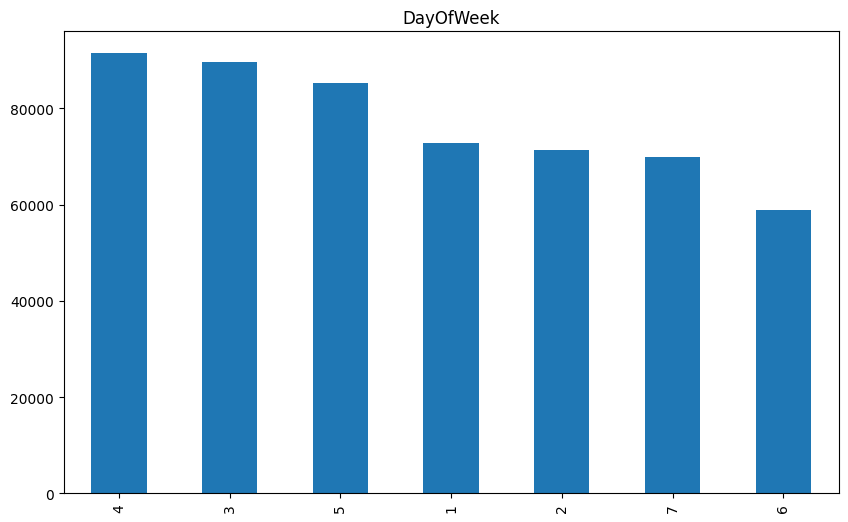

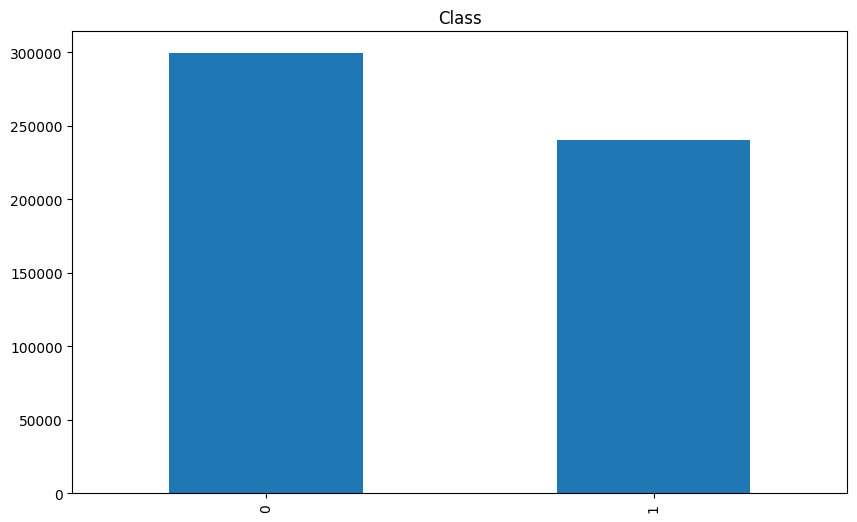

In [53]:
cat_cols = ['Airline', 'DayOfWeek', 'Class']

#Plotting bar charts for the categorical variables
for col in cat_cols:
    plt.figure(figsize=(10,6))
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


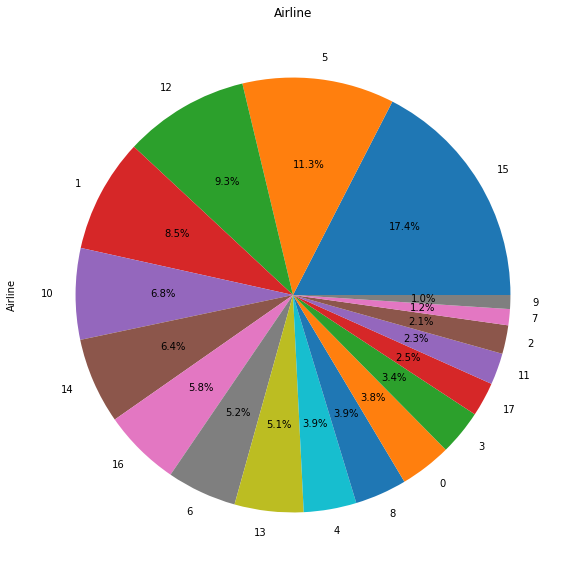

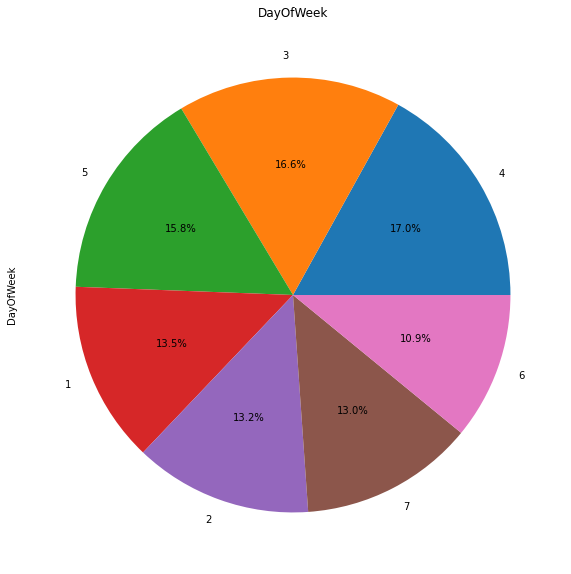

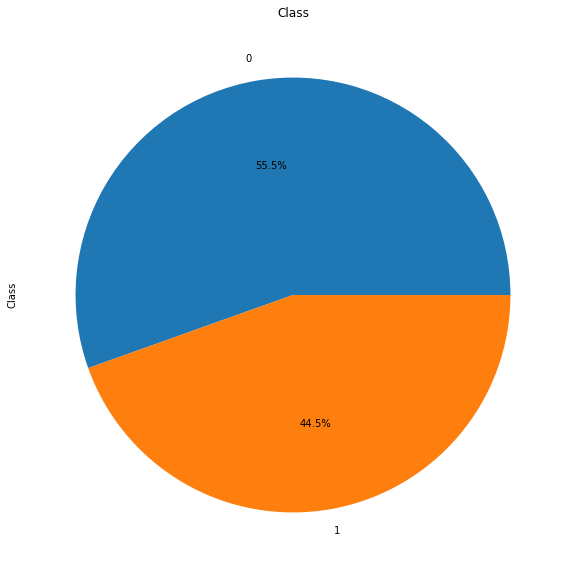

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10,10))
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(col)
    plt.show()
    

<AxesSubplot:xlabel='Airline', ylabel='count'>

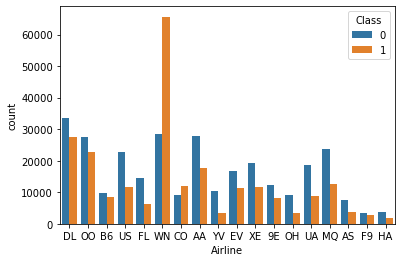

In [ ]:
sns.countplot(x='Airline', hue='Class', data=data)

 Here we see WN is the heighest delay than others airliness



<AxesSubplot:xlabel='Airline', ylabel='Length'>

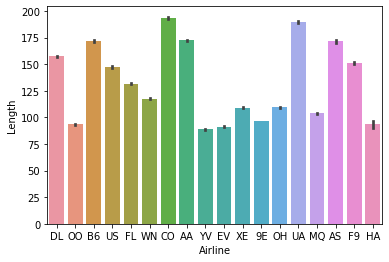

In [ ]:
sns.barplot(x='Airline', y='Length', data=data);

Here we see CO and UA have longest average flight time.

<AxesSubplot:xlabel='Airline', ylabel='Time'>

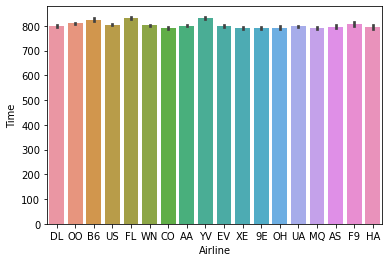

In [ ]:
sns.barplot(x='Airline', y='Time', data=data)

 Here we see almost all of the flights have same departure time

## Perform Chi-square test to check dependency of categorical variables on "Class" attribute

### H0 : there is no significant dependency between the categorical variables and 'Class'

### H1 : there is a significant association between the categorical variables and 'Class'

In [54]:
from scipy.stats import chi2_contingency
#Create contingency tables for categorical columns
contingency_table_airline = pd.crosstab(data['Airline'], data['Class'])
contingency_table_airportfrom = pd.crosstab(data['AirportFrom'], data['Class'])
contingency_table_airportto = pd.crosstab(data['AirportTo'], data['Class'])
contingency_table_dayofweek = pd.crosstab(data['DayOfWeek'], data['Class'])
contingency_table_flight = pd.crosstab(data['Flight'], data['Class'])
contingency_table_length = pd.crosstab(data['Length'], data['Class'])


In [55]:
# Perform chi-square tests for the Categorical Variables

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_airline)
print(f"Airline - chi2: {chi2}, p-value: {p}")

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_airportfrom)
print(f"AirportFrom - chi2: {chi2}, p-value: {p}")

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_airportto)
print(f"AirportTo - chi2: {chi2}, p-value: {p}")

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_dayofweek)
print(f"DayOfWeek - chi2: {chi2}, p-value: {p}")

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_flight)
print(f"Flight - chi2: {chi2}, p-value: {p}")

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_length)
print(f"Length - chi2: {chi2}, p-value: {p}")


Airline - chi2: 38193.243961480395, p-value: 0.0
AirportFrom - chi2: 17463.744643958886, p-value: 0.0
AirportTo - chi2: 15145.026396765354, p-value: 0.0
DayOfWeek - chi2: 1178.019697223239, p-value: 2.7350340365614405e-251
Flight - chi2: 29607.849723638767, p-value: 0.0
Length - chi2: 9809.960312746814, p-value: 0.0


## Conclusion : As p-value for the contingency tables is less than 0.05, we can reject the null hypothesis and conclude that there is a significant association between the categorical variables and 'Class' 

# 4.4 Logistic Regression 

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate the model's accuracy on the test set
y_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", logreg_accuracy*100,"%")

Logistic Regression Accuracy: 58.17644168821899 %


In [ ]:
print("Precision:", precision_score(y_test, y_pred))


Precision: 0.5486437266366337


 Conclusion : The accuracy of Logistic Regression model is 58.17%
### Thus Logistic Regression is a better model for our data

# 4.5 Resampling Methods

## Cross-validation 

In [ ]:
# Resample the data
oversample = RandomOverSampler(sampling_strategy='minority')
X_res, y_res = oversample.fit_resample(X, y)
# Define k-fold cross validation object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Calculate accuracy using k-fold cross validation with resampling
accuracy_scores = cross_val_score(logreg, X_res, y_res, cv=cv, scoring='accuracy')

# Print the accuracy
print("Accuracy with resampling methods:", accuracy_scores.mean())

Accuracy with resampling methods: 0.5683492663560613


In [ ]:
# calculate mse
mse = mean_squared_error(y_test, y_pred)
mse

0.41828193220056176

## Bootstrapping 

In [ ]:
from sklearn.utils import resample


In [ ]:
n_times = 10
test_score = []
train_score = []
for i in range(n_times):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42+i)
    logreg = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    Accuracy = accuracy_score(y_test, y_pred)
    test_score.append(Accuracy)
    train_score.append(accuracy_score(y_train, logreg.predict(X_train)))

In [ ]:
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

In [ ]:
# Print the results
print("Mean accuracy score:", mean_score)

Mean accuracy score: 0.5728760260187391


# 4.6 Linear Model Selection and Regularization




Linear Model Selection : Foward Selection, Backward Selection

## Forward Selection 

In [ ]:
sfs_forward = SFS(LogisticRegression(max_iter=10000), 
                   k_features=(1, len(X_train.columns)), 
                   forward=True, 
                   floating=False, 
                   verbose=2, 
                   scoring='accuracy', 
                   cv=5)
sfs_forward = sfs_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.6s finished

[2023-04-30 23:26:33] Features: 1/7 -- score: 0.5647118805112339[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.1s finished

[2023-04-30 23:26:54] Features: 2/7 -- score: 0.5740142060926293[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.8s finished

[2023-04-30 23:27:11] Features: 3/7 -- score: 0.5789735924265073[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
# Print the selected features
print('Forward selection:', sfs_forward.k_feature_names_)


Forward selection: ('Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek')


In [ ]:
# Select the features from forward selection and fit the logistic regression model
X_train_forward = X_train.iloc[:, list(sfs_forward.k_feature_idx_)]
X_test_forward = X_test.iloc[:, list(sfs_forward.k_feature_idx_)]
model_forward = LogisticRegression(solver='liblinear')
model_forward.fit(X_train_forward, y_train)


LogisticRegression(solver='liblinear')

In [ ]:
y_pred_forward = model_forward.predict(X_test_forward)
accuracy_forward = accuracy_score(y_test, y_pred_forward)
#Print the accuracy of the forward selection logistic regression model
print("Accuracy after forward selection: ", accuracy_forward*100, '%')

Accuracy after forward selection:  57.79452524634537 %


## Backward Selection

In [ ]:
sfs_backward = SFS(LogisticRegression(max_iter=10000), 
                   k_features=(1, len(X_train.columns)), 
                   forward=False, 
                   floating=False, 
                   verbose=2, 
                   scoring='accuracy', 
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.3min finished

[2023-04-30 23:33:07] Features: 6/1 -- score: 0.5835691359312175[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   40.7s finished

[2023-04-30 23:33:47] Features: 5/1 -- score: 0.5819237320540898[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.9s finished

[2023-04-30 23:34:17] Features: 4/1 -- score: 0.5788808936165282[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
# Print the selected features
print('Backward selection:', sfs_backward.k_feature_names_)

Backward selection: ('Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo')


In [ ]:
# Select the features from backward selection and fit the logistic regression model
X_train_backward = X_train.iloc[:, list(sfs_backward.k_feature_idx_)]
X_test_backward = X_test.iloc[:, list(sfs_backward.k_feature_idx_)]
model_backward = LogisticRegression(solver='liblinear')
model_backward.fit(X_train_backward, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Predict the test set using the backward selection logistic regression model
y_pred_backward = model_backward.predict(X_test_backward)
accuracy_backward = accuracy_score(y_test, y_pred_backward)
# Print the accuracy of the backward selection logistic regression model
print("Accuracy after backward selection: ", accuracy_backward*100, '%')

Accuracy after backward selection:  58.07910861444052 %


### Conclusion : We can observe that Accuracy after forward selection:  57.79% and Accuracy after backward selection:  58.079 %

# Regularise the Logistic Regression model with Ridge and Lasso Regression

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [ ]:
y_pred = logreg.predict(X_test)


In [ ]:
#Ridge regression

In [ ]:
# Regularize the logistic regression model using Ridge regression
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
y_pred = ridge.predict(X_test)
ridge_accuracy= accuracy_score(y_test, y_pred.round())
print("Accuracy score of Ridge regression model: ", ridge_accuracy*100, '%')

Accuracy score of Ridge regression model:  58.17736866987402 %


In [ ]:
#Lasso regression

In [ ]:
# Regularize the logistic regression model using Lasso regression
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)


In [ ]:
# Evaluate the Lasso regression model
y_pred = lasso.predict(X_test)
lasso_accuracy= accuracy_score(y_test, y_pred.round())
print("Accuracy score of Lasso regression model: ", lasso_accuracy*100, "%")

Accuracy score of Lasso regression model:  56.80728978373518 %


### Conclusion: We can observe that Accuracy after Regularise model :
* With Ridge regression:  58.17 %

* With Lasso Regression: 56.80%


## 4.7 Moving Beyond Linearity 

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

## Using Splines to transform the features

In [ ]:
X_splines = dmatrix("bs(data['Time'], df=4, include_intercept=False)", {"data": data})

Polynomial regression model using spline regularisation:

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(2), model)
poly_model.fit(X_splines, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [ ]:
# Print the accuracy of the model
accuracy = poly_model.score(X_splines, y)
print("Accuracy:", accuracy*100, '%')

Accuracy: 57.05233025944507 %


### Polynomial regression without spline regularisation

In [ ]:
# Create polynomial features with degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)

In [ ]:
# Calculate the R2 score
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.045893065939310085


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.23579197799525078


### Conclusion: As observed, after performing spline regularisation on the Polynomial regression model our accuracy is more than the polynomial regression r2 score


Experimenting: RandomForestClassifier Model to see if accuracy is improving 

In [ ]:

rf = RandomForestClassifier(n_estimators=60, max_depth=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=60)

In [ ]:
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy:", rf_accuracy*100,"%")

RandomForestClassifier Accuracy: 65.18534998192386 %


In [ ]:
print("Precision:", precision_score(y_test, rf_pred))


Precision: 0.6865151941474396


As observed, RandomForestClassifier has 65.18% accuracy, thus it is the best model for our prediction, with a precision of 0.68

# Conclusion :

Based on the analysis and modeling performed in the project, the following conclusions can be drawn:

The dataset provided contains information about airline delays, including the time of the delay, length of the delay, airline, origin airport, destination airport, day of the week, and class.

As our sample size is large, due to the central limit theorem the data is considered to be normal. We used Z-test to determine whether 2 sample means are different or not and found out that that there is significant difference between the 2 sample means. Further, we used the F-test for the analysis and concluded that there is no significant difference in the means of the different groups (airlines and class).

Exploratory data analysis revealed that delays tend to occur more frequently on certain airlines, at certain airports, and on certain days of the week.

During our analysis of categorical data, we performed chi-square test and summarised that there is a dependency of the categorical variables on the 'Class' attribute. 

Logistic regression was performed to predict the length of a delay based on the other variables in the dataset; achieved accuracy of 58.17%

Resampling techniques, Cross Validation and bootstrapping, were used to estimate the variability of the model's accuracy and to assess the impact of different modeling choices. 

Performed ridge and lasso regression to regularise our Logistic Regression Model with Ridge accuracy being 58.17 % and Lasso regression accuracy being 56.80%. We also moved beyond linearity and performed polynomial regression on our data. We regularised the features with splines and gained accuracy of 57.05%. Understanding that Logistic Regression is the best fit for our model. 

Overall, the project provides valuable insights into the factors that contribute to airline delays and demonstrates how machine learning techniques can be used to predict delay times with reasonable accuracy.

## References:
https://www.kaggle.com/code/mckayla/airlines-delay/notebook 

https://www.google.com/

* Rice, J. A. (2006). Mathematical statistics and data analysis. Cengage Learning.

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2015). An Introduction to Statistical Learning with Applications in R, Edn. 6th.

* Pawar, Aishwarya. (2022). Data Analysis Using Statistical Methods: Case Study of Categorizing the Species of Penguin
